In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread("../DATA/solvay_conference.jpg",0)

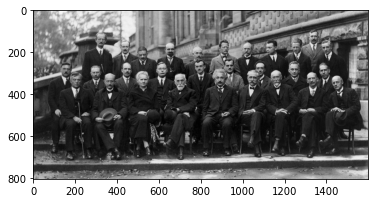

In [4]:
plt.imshow(solvay, cmap="gray")

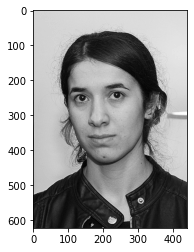

In [5]:
plt.imshow(nadia, cmap="gray")

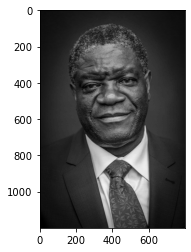

In [6]:
plt.imshow(denis, cmap="gray")

In [34]:
# face_cascade = cv2.CascadeClassifier("../DATA/harrcascades/haarcascade_frontalface_default.xml")
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [35]:
def detect_face(img):

    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for(x,y,w,h) in face_rects :
        cv2.rectangle(face_img,(x,y),(x+w, y+h), (255,255,255),10)
    
    return face_img
    

In [38]:
result = detect_face(denis)

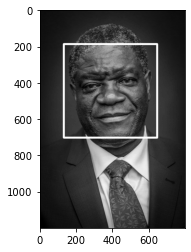

In [39]:
plt.imshow(result, cmap="gray")

In [40]:
result = detect_face(nadia)

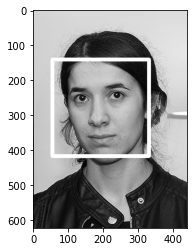

In [41]:
plt.imshow(result, cmap="gray")

In [42]:
result = detect_face(solvay)

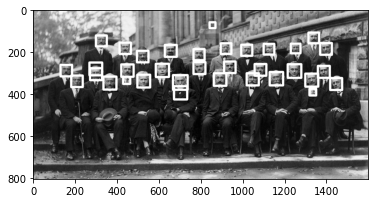

In [43]:
plt.imshow(result, cmap="gray")


In [46]:
def adj_detect_face(img):

    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    for(x,y,w,h) in face_rects :
        cv2.rectangle(face_img,(x,y),(x+w, y+h), (255,255,255),10)
    
    return face_img

In [47]:
res = adj_detect_face(solvay)

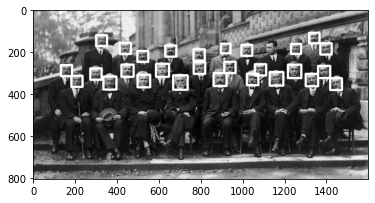

In [49]:
plt.imshow(res, cmap="gray")

In [50]:
eye_cascade = cv2.CascadeClassifier("../DATA/haarcascades/haarcascade_eye.xml")

In [55]:
def detect_eyes(img):

    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    for(x,y,w,h) in eyes_rects :
        cv2.rectangle(face_img,(x,y),(x+w, y+h), (255,255,255),10)
    
    return face_img

In [56]:
result = detect_eyes(nadia)

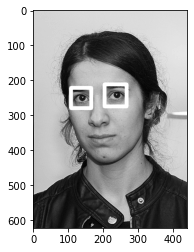

In [57]:
plt.imshow(result, cmap="gray")

In [58]:
result = detect_eyes(denis)


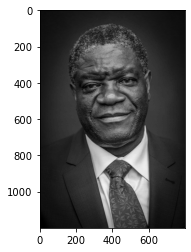

In [59]:
plt.imshow(result, cmap="gray")

In [61]:
#for video
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)

    cv2.imshow('Video Face Detect', frame)

    k = cv2.waitKey(1)
    if k==27:
        break


cap.release()
cv2.destroyAllWindows()